In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
menu = pd.read_csv("Restaurant_Orders/menu_items.csv")
print(menu.head())

order_details = pd.read_csv("Restaurant_Orders/order_details.csv")
print(order_details.head())

   menu_item_id      item_name  category  price
0           101      Hamburger  American  12.95
1           102   Cheeseburger  American  13.95
2           103        Hot Dog  American   9.00
3           104  Veggie Burger  American  10.50
4           105   Mac & Cheese  American   7.00
   order_details_id  order_id order_date   order_time  item_id
0                 1         1     1/1/23  11:38:36 AM    109.0
1                 2         2     1/1/23  11:57:40 AM    108.0
2                 3         2     1/1/23  11:57:40 AM    124.0
3                 4         2     1/1/23  11:57:40 AM    117.0
4                 5         2     1/1/23  11:57:40 AM    129.0


In [15]:
print(menu.info())
print(order_details.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB
None


In [16]:
print(menu.isnull().sum())
print(order_details.isnull().sum())

menu_item_id    0
item_name       0
category        0
price           0
dtype: int64
order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64


In [17]:
menu["item_id"] = menu["menu_item_id"]
menu.head()

,menu_item_id,item_name,category,price,item_id
0,101,Hamburger,American,12.95,101
1,102,Cheeseburger,American,13.95,102
2,103,Hot Dog,American,9.00,103
3,104,Veggie Burger,American,10.50,104
4,105,Mac & Cheese,American,7.00,105


In [18]:
merged_df = pd.merge(order_details, menu, on="item_id", how="left")
merged_df.head()

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109.0,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,1/1/23,11:57:40 AM,108.0,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,1/1/23,11:57:40 AM,124.0,124.0,Spaghetti,Italian,14.50
3,4,2,1/1/23,11:57:40 AM,117.0,117.0,Chicken Burrito,Mexican,12.95
4,5,2,1/1/23,11:57:40 AM,129.0,129.0,Mushroom Ravioli,Italian,15.50


In [19]:
empty_orders = merged_df[merged_df["item_id"].isnull()]
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
menu_item_id        0
item_name           0
category            0
price               0
dtype: int64

In [20]:
'''df = merged_df.copy()

df['order_date'] = pd.to_datetime(df['order_date'])

# ✅ Step 1: Convert order_time string to datetime.time (with AM/PM handled)
df['order_time'] = pd.to_datetime(df['order_time'], format='%I:%M:%S %p').dt.time

# ✅ Step 2: Combine order_date and order_time into full datetime
df['order_datetime'] = pd.to_datetime(df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + df['order_time'].astype(str))

# ✅ Step 3: Extract hour and create hourly bucket labels
df['hour'] = df['order_datetime'].dt.hour
df['bucket'] = df['hour'].astype(str).str.zfill(2) + ':00-' + (df['hour'] + 1).astype(str).str.zfill(2) + ':00'

# ✅ Step 4: Count orders per time bucket
order_counts = df['bucket'].value_counts().sort_index()

# ✅ Step 5: Create all 24 hourly buckets
all_buckets = [f"{str(h).zfill(2)}:00-{str(h+1).zfill(2)}:00" for h in range(24)]
all_buckets_series = pd.Series(0, index=all_buckets, name='order_count')

# ✅ Step 6: Merge with actual counts, filling missing with 0
final_counts = all_buckets_series.add(order_counts, fill_value=0)

# ✅ Step 7: Plot
final_counts.plot(kind='bar', figsize=(12, 6), title='Orders by Hourly Time Bucket')
plt.xlabel('Time Bucket')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()'''

'df = merged_df.copy()\n\ndf[\'order_date\'] = pd.to_datetime(df[\'order_date\'])\n\n# ✅ Step 1: Convert order_time string to datetime.time (with AM/PM handled)\ndf[\'order_time\'] = pd.to_datetime(df[\'order_time\'], format=\'%I:%M:%S %p\').dt.time\n\n# ✅ Step 2: Combine order_date and order_time into full datetime\ndf[\'order_datetime\'] = pd.to_datetime(df[\'order_date\'].dt.strftime(\'%Y-%m-%d\') + \' \' + df[\'order_time\'].astype(str))\n\n# ✅ Step 3: Extract hour and create hourly bucket labels\ndf[\'hour\'] = df[\'order_datetime\'].dt.hour\ndf[\'bucket\'] = df[\'hour\'].astype(str).str.zfill(2) + \':00-\' + (df[\'hour\'] + 1).astype(str).str.zfill(2) + \':00\'\n\n# ✅ Step 4: Count orders per time bucket\norder_counts = df[\'bucket\'].value_counts().sort_index()\n\n# ✅ Step 5: Create all 24 hourly buckets\nall_buckets = [f"{str(h).zfill(2)}:00-{str(h+1).zfill(2)}:00" for h in range(24)]\nall_buckets_series = pd.Series(0, index=all_buckets, name=\'order_count\')\n\n# ✅ Step 6: Mer

In [21]:
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format = 'mixed')
print(f' date data type: ',{type(merged_df["order_date"][1])})
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], format = 'mixed').dt.time
print(f' time data type: ',{type(merged_df["order_time"][1])})

merged_df['time_seconds'] = merged_df['order_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
merged_df['weekday'] = merged_df['order_date'].dt.day_name()

print(merged_df['weekday'].unique())
print(merged_df.head())


 date data type:  {<class 'pandas._libs.tslibs.timestamps.Timestamp'>}
 time data type:  {<class 'datetime.time'>}
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
   order_details_id  order_id order_date order_time  item_id  menu_item_id  \
0                 1         1 2023-01-01   11:38:36    109.0         109.0   
1                 2         2 2023-01-01   11:57:40    108.0         108.0   
2                 3         2 2023-01-01   11:57:40    124.0         124.0   
3                 4         2 2023-01-01   11:57:40    117.0         117.0   
4                 5         2 2023-01-01   11:57:40    129.0         129.0   

          item_name category  price  time_seconds weekday  
0  Korean Beef Bowl    Asian  17.95         41916  Sunday  
1     Tofu Pad Thai    Asian  14.50         43060  Sunday  
2         Spaghetti  Italian  14.50         43060  Sunday  
3   Chicken Burrito  Mexican  12.95         43060  Sunday  
4  Mushroom Ravioli  Italian  15.50        

In [22]:
merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: '0:00-1:00' if x <= 1 * 3600 else
            '1:00-2:00' if 1 * 3600 < x <= 2 * 3600 else
            '2:00-3:00' if 2 * 3600 < x <= 3 * 3600 else
            '3:00-4:00' if 3 * 3600 < x <= 4 * 3600 else
            '4:00-5:00' if 4 * 3600 < x <= 5 * 3600 else
            '5:00-6:00' if 5 * 3600 < x <= 6 * 3600 else
            '6:00-7:00' if 6 * 3600 < x <= 7 * 3600 else
            '7:00-8:00' if 7 * 3600 < x <= 8 * 3600 else
            '8:00-9:00' if 8 * 3600 < x <= 9 * 3600 else
            '9:00-10:00' if 9 * 3600 < x <= 10 * 3600 else
            '10:00-11:00' if 10 * 3600 < x <= 11 * 3600 else
            '11:00-12:00' if 11 * 3600 < x <= 12 * 3600 else
            '12:00-13:00' if 12 * 3600 < x <= 13 * 3600 else
            '13:00-14:00' if 13 * 3600 < x <= 14 * 3600 else
            '14:00-15:00' if 14 * 3600 < x <= 15 * 3600 else
            '15:00-16:00' if 15 * 3600 < x <= 16 * 3600 else
            '16:00-17:00' if 16 * 3600 < x <= 17 * 3600 else
            '17:00-18:00' if 17 * 3600 < x <= 18 * 3600 else
            '18:00-19:00' if 18 * 3600 < x <= 19 * 3600 else
            '19:00-20:00' if 19 * 3600 < x <= 20 * 3600 else
            '20:00-21:00' if 20 * 3600 < x <= 21 * 3600 else
            '21:00-22:00' if 21 * 3600 < x <= 22 * 3600 else
            '22:00-23:00' if 22 * 3600 < x <= 23 * 3600 else
            '23:00-24:00'
)
print(merged_df['time_bucket'].value_counts())

time_bucket
12:00-13:00    1658
13:00-14:00    1566
17:00-18:00    1355
18:00-19:00    1293
19:00-20:00    1074
16:00-17:00    1035
14:00-15:00     949
20:00-21:00     879
15:00-16:00     742
11:00-12:00     625
21:00-22:00     600
22:00-23:00     305
23:00-24:00      11
10:00-11:00       5
Name: count, dtype: int64


In [23]:
'''merged_df['time_bucket'] =merged_df['time_seconds'].apply(
    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else
              'Lunch' if 11 * 3600 <= x < 16 * 3600 else
              'Evening' if 16 * 3600 <= x < 20 * 3600 else
              'Night'
)
print(merged_df['time_bucket'].value_counts())'''

"merged_df['time_bucket'] =merged_df['time_seconds'].apply(\n    lambda x: 'Breakfast' if 6 * 3600 <= x < 11 * 3600 else\n              'Lunch' if 11 * 3600 <= x < 16 * 3600 else\n              'Evening' if 16 * 3600 <= x < 20 * 3600 else\n              'Night'\n)\nprint(merged_df['time_bucket'].value_counts())"

In [24]:
merged_df[merged_df['time_bucket']== '21:00-22:00']

,order_details_id,order_id,order_date,order_time,item_id,menu_item_id,item_name,category,price,time_seconds,weekday,time_bucket
150,151,65,2023-01-01,21:16:00,112.0,112.0,Salmon Roll,Asian,14.95,76560,Sunday,21:00-22:00
151,152,65,2023-01-01,21:16:00,120.0,120.0,Steak Torta,Mexican,13.95,76560,Sunday,21:00-22:00
152,153,65,2023-01-01,21:16:00,122.0,122.0,Chips & Salsa,Mexican,7.00,76560,Sunday,21:00-22:00
153,154,65,2023-01-01,21:16:00,123.0,123.0,Chips & Guacamole,Mexican,9.00,76560,Sunday,21:00-22:00
154,155,66,2023-01-01,21:47:55,108.0,108.0,Tofu Pad Thai,Asian,14.50,78475,Sunday,21:00-22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
12224,12225,5367,2023-03-31,21:58:06,119.0,119.0,Chicken Torta,Mexican,11.95,79086,Friday,21:00-22:00
12225,12226,5368,2023-03-31,21:58:47,101.0,101.0,Hamburger,American,12.95,79127,Friday,21:00-22:00
12226,12227,5368,2023-03-31,21:58:47,128.0,128.0,Cheese Lasagna,Italian,15.50,79127,Friday,21:00-22:00
12227,12228,5368,2023-03-31,21:58:47,113.0,113.0,Edamame,Asian,5.00,79127,Friday,21:00-22:00


In [ ]:
'''plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='time_bucket')
plt.xticks(rotation=45)
plt.tight_layout()      
plt.show()'''

C:\Users\yania\AppData\Local\Temp\ipykernel_8476\2941427803.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\yania\AppData\Local\Temp\ipykernel_8476\2941427803.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


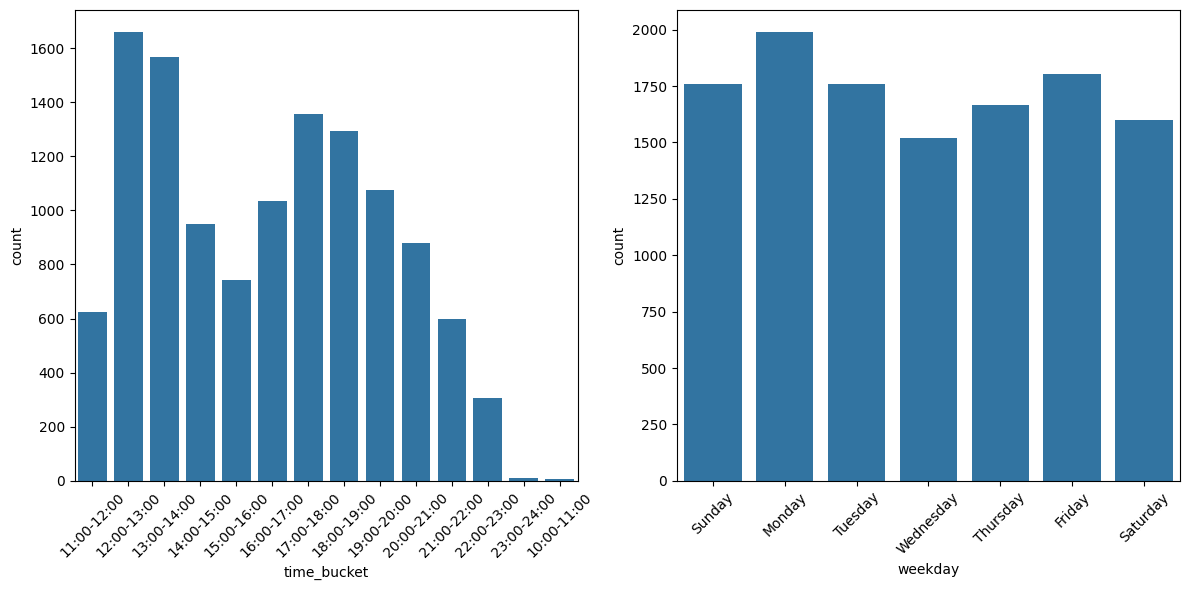

In [36]:
fig,axes = plt.subplots(1,2, figsize=(12, 6))
sns.countplot(data=merged_df, x='time_bucket', ax=axes[0])
sns.countplot(data=merged_df, x='weekday', ax=axes[1])
# Rotate x-axis labels on each subplot
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()       # Adjust layout to prevent clipping
plt.show()